In [71]:
# Start by loading in some basics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

#plt.rcParams['figure.figsize'] = 12, 10

In [2]:
# Read in the file, make it a dataframe and examine the data

with open('C:/Users/mdkhi/Documents/ultimate_challenge/logins.json', 'r') as read_file:
    data = json.load(read_file)
    
df = pd.DataFrame(data)

df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [95]:
df.tail()

,Login,Weekday,Time batch,Month
93137,1970-04-13 18:50:19,0,18.75,4
93138,1970-04-13 18:43:56,0,18.50,4
93139,1970-04-13 18:54:02,0,18.75,4
93140,1970-04-13 18:57:38,0,18.75,4
93141,1970-04-13 18:54:23,0,18.75,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null object
dtypes: object(1)
memory usage: 727.8+ KB


In [4]:
# It'll be easier to work with datetimes than strings, so do a little conversion and examine the data again

from datetime import datetime

test = []

for i in range(len(df)):
    test.append(datetime.strptime(df[i:(i+1)]['login_time'].to_string(index=False),'%Y-%m-%d %H:%M:%S'))
    
df = pd.DataFrame(test,columns=['Login'])
df.head()

,Login
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
Login    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [22]:
# That's better.  Now, the problem is asking for 15 minute intervals and trends such as daily cycles, so let's gather that
# kind of information.  For the record, in datetime's weekday function, Monday is 0 through Sunday is 6.  Also, let's
# convert the time to a float with quarter hour increments

weekdays = [item.weekday() for item in df['Login']]
time_batch = [int((item.hour*4) + (item.minute/15)) for item in df['Login']]

df['Weekday'] = weekdays
df['Time batch'] = time_batch
df['Time batch'] /= 4

df.head()

,Login,Weekday,Time batch
0,1970-01-01 20:13:18,3,20.00
1,1970-01-01 20:16:10,3,20.25
2,1970-01-01 20:16:37,3,20.25
3,1970-01-01 20:16:36,3,20.25
4,1970-01-01 20:26:21,3,20.25


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 3 columns):
Login         93142 non-null datetime64[ns]
Weekday       93142 non-null int64
Time batch    93142 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 MB


In [27]:
# Looking good.  Now, let's find some trends.

traffic_by_day = pd.value_counts(df['Weekday'].values, sort=False)
print(traffic_by_day)

0     8823
1     9268
2    10339
3    11960
4    15208
5    19377
6    18167
dtype: int64


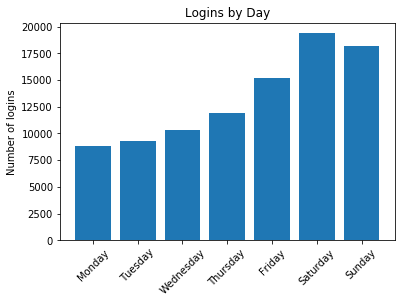

In [39]:
# So, business grows steadily from Monday to Thursday, jumps up Friday, jumps up again Saturday, drops a little on Sunday
# and plummets back down to start agin on Monday.

plt.bar(np.arange(7),traffic_by_day)
plt.xticks(np.arange(7),['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],rotation=45)
plt.title('Logins by Day')
plt.ylabel('Number of logins')
plt.show()

In [46]:
traffic_by_hour = pd.value_counts(df['Time batch'].values).sort_index()
print(traffic_by_hour)

0.00     1439
0.25     1547
0.50     1525
0.75     1482
1.00     1549
1.25     1598
1.50     1673
1.75     1497
2.00     1509
2.25     1526
2.50     1429
2.75     1336
3.00     1275
3.25     1302
3.50     1162
3.75     1092
4.00     1132
4.25     1164
4.50     1334
4.75     1404
5.00     1173
5.25      770
5.50      545
5.75      457
6.00      369
6.25      320
6.50      235
6.75      214
7.00      219
7.25      229
         ... 
16.50     700
16.75     714
17.00     637
17.25     612
17.50     644
17.75     691
18.00     697
18.25     690
18.50     767
18.75     826
19.00     768
19.25     744
19.50     842
19.75     881
20.00     849
20.25     970
20.50    1069
20.75    1215
21.00    1252
21.25    1325
21.50    1492
21.75    1554
22.00    1634
22.25    1652
22.50    1684
22.75    1637
23.00    1573
23.25    1552
23.50    1456
23.75    1477
Length: 96, dtype: int64


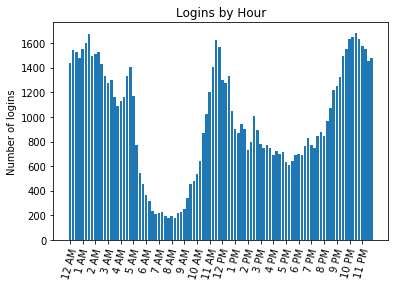

In [55]:
# That's not very useful.  Visually maybe.

plt.bar(np.arange(96),traffic_by_hour)
# Setup a list for the tick marks to be every 4th time batch, i.e. hourly
xmarks=[i for i in range(0,96,4)]
plt.xticks(xmarks,['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM','9 AM','10 AM','11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM','8 PM','9 PM','10 PM','11 PM'], rotation=75)
plt.title('Logins by Hour')
plt.ylabel('Number of logins')
plt.show()

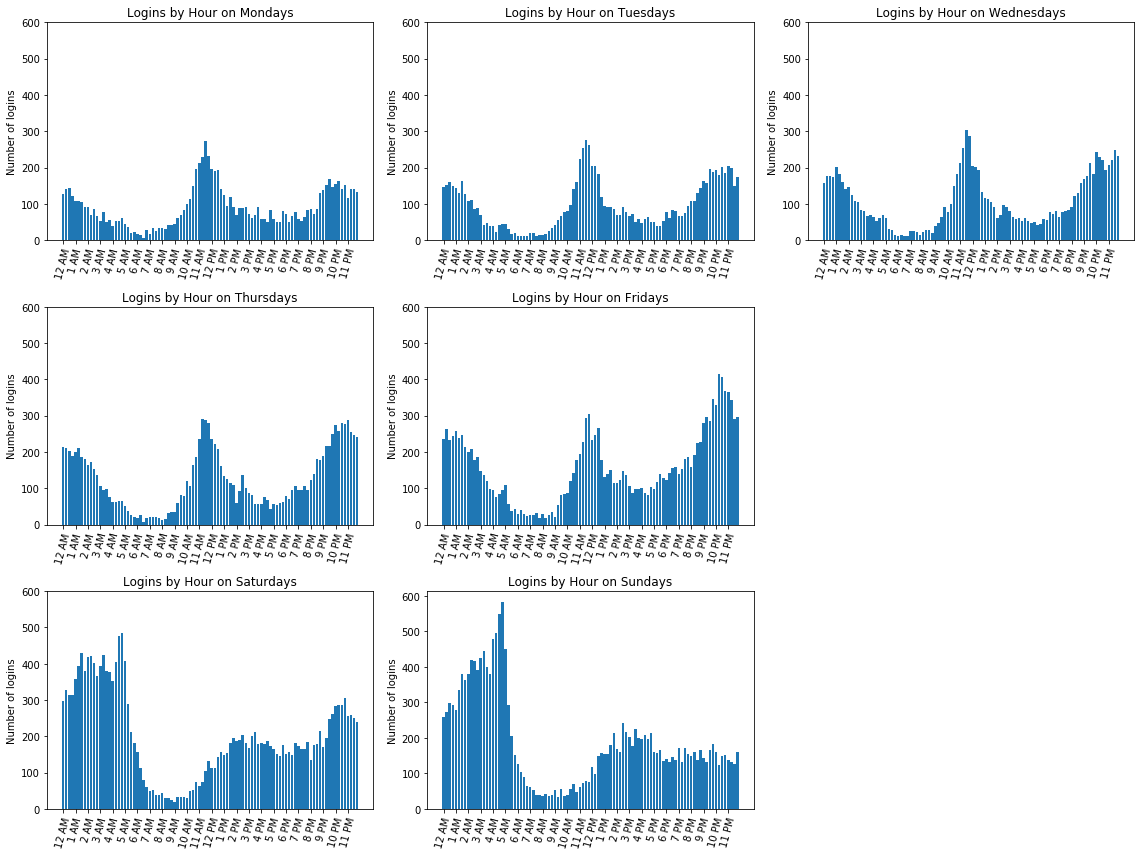

In [91]:
# OK, now to combine those 2 plots and break everything down by day and hour.

mon_traffic_by_hour = df[df['Weekday'] == 0]
mon_traffic_by_hour = pd.value_counts(mon_traffic_by_hour['Time batch'].values).sort_index()
tue_traffic_by_hour = df[df['Weekday'] == 1]
tue_traffic_by_hour = pd.value_counts(tue_traffic_by_hour['Time batch'].values).sort_index()
wed_traffic_by_hour = df[df['Weekday'] == 2]
wed_traffic_by_hour = pd.value_counts(wed_traffic_by_hour['Time batch'].values).sort_index()
thu_traffic_by_hour = df[df['Weekday'] == 3]
thu_traffic_by_hour = pd.value_counts(thu_traffic_by_hour['Time batch'].values).sort_index()
fri_traffic_by_hour = df[df['Weekday'] == 4]
fri_traffic_by_hour = pd.value_counts(fri_traffic_by_hour['Time batch'].values).sort_index()
sat_traffic_by_hour = df[df['Weekday'] == 5]
sat_traffic_by_hour = pd.value_counts(sat_traffic_by_hour['Time batch'].values).sort_index()
sun_traffic_by_hour = df[df['Weekday'] == 6]
sun_traffic_by_hour = pd.value_counts(sun_traffic_by_hour['Time batch'].values).sort_index()

plt.figure(figsize=(16,12))

plt.subplot(331)
plt.bar(np.arange(96),mon_traffic_by_hour)
plt.xticks(xmarks,['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM','9 AM','10 AM','11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM','8 PM','9 PM','10 PM','11 PM'], rotation=75)
plt.title('Logins by Hour on Mondays')
plt.ylim((0,600))
plt.ylabel('Number of logins')

plt.subplot(332)
plt.bar(np.arange(96),tue_traffic_by_hour)
plt.xticks(xmarks,['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM','9 AM','10 AM','11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM','8 PM','9 PM','10 PM','11 PM'], rotation=75)
plt.title('Logins by Hour on Tuesdays')
plt.ylim((0,600))
plt.ylabel('Number of logins')

plt.subplot(333)
plt.bar(np.arange(96),wed_traffic_by_hour)
plt.xticks(xmarks,['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM','9 AM','10 AM','11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM','8 PM','9 PM','10 PM','11 PM'], rotation=75)
plt.title('Logins by Hour on Wednesdays')
plt.ylim((0,600))
plt.ylabel('Number of logins')

plt.subplot(334)
plt.bar(np.arange(96),thu_traffic_by_hour)
plt.xticks(xmarks,['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM','9 AM','10 AM','11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM','8 PM','9 PM','10 PM','11 PM'], rotation=75)
plt.title('Logins by Hour on Thursdays')
plt.ylim((0,600))
plt.ylabel('Number of logins')

plt.subplot(335)
plt.bar(np.arange(96),fri_traffic_by_hour)
plt.xticks(xmarks,['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM','9 AM','10 AM','11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM','8 PM','9 PM','10 PM','11 PM'], rotation=75)
plt.title('Logins by Hour on Fridays')
plt.ylim((0,600))
plt.ylabel('Number of logins')

plt.subplot(337)
plt.bar(np.arange(96),sat_traffic_by_hour)
plt.xticks(xmarks,['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM','9 AM','10 AM','11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM','8 PM','9 PM','10 PM','11 PM'], rotation=75)
plt.title('Logins by Hour on Saturdays')
plt.ylim((0,600))
plt.ylabel('Number of logins')

plt.subplot(338)
plt.bar(np.arange(96),sun_traffic_by_hour)
plt.xticks(xmarks,['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM','9 AM','10 AM','11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM','8 PM','9 PM','10 PM','11 PM'], rotation=75)
plt.title('Logins by Hour on Sundays')
plt.ylabel('Number of logins')

plt.tight_layout()

plt.show()

Weekdays all show similar patterns, a spike in logins between 11 am and noon around 300, and an increase between
9 pm and 11 pm which grows a little from Monday, around 150, to Wednesday, around 200.  By Thursday that increase
is about as high as the midday spike, at around 300, and by Friday that increase is greater than the midday spike,
at around 400.  Weekends show different trends, with Saturdays showing peak logins between 1 am and 5 am, around 400,
a low peak between 1 pm and 4 pm, around 200, and a middle peak between 10 pm and 11 pm, just under 300.  Sundays show
the busiest peak of all, beginning at midnight, around 300, and growing until 5 am, around 600, with a small peak 
between 2 pm and 5 pm, around 200.

In [98]:
months = [item.month for item in df['Login']]

df['Month'] = months

traffic_by_month = pd.value_counts(df['Month'].values, sort=False)
# "Normalize" by day
traffic_by_month[0:1] /= 31
traffic_by_month[1:2] /= 28
traffic_by_month[2:3] /= 31
# Only 13 days worth of data in April
traffic_by_month[3:4] /= 13

print(traffic_by_month)

1     685.129032
2     881.178571
3    1087.838710
4    1039.000000
dtype: float64


In [ ]:
# Monthly data isn't as useful, because the last month only contains data until the 13th, but it does show growth, so
# perhaps this analysis should be done again when more data is available.